In [1]:
import json
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

algorithm_globals.random_seed = 42

In [3]:
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits,reps=5)

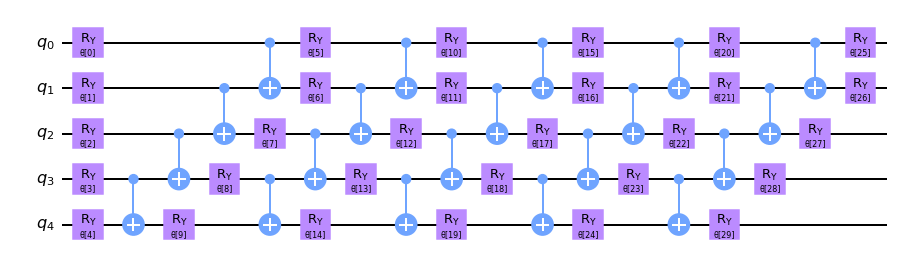

In [8]:
num_qubits=5
cric=ansatz(num_qubits)
cric.decompose().draw('mpl')

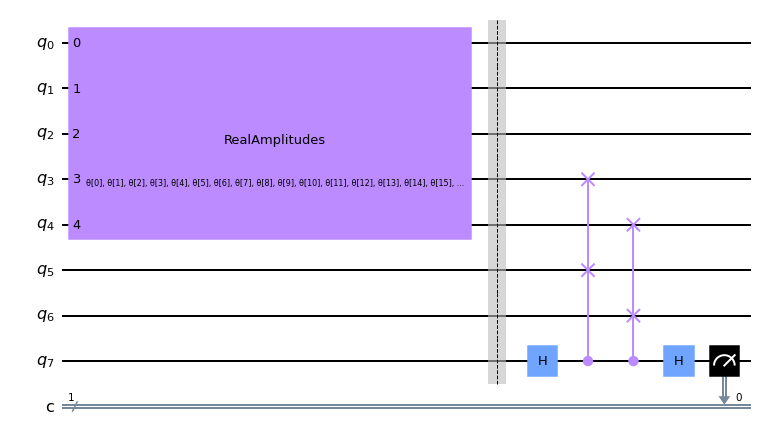

In [11]:
def auto_encoder_circuit(num_latent, num_trash):
    qr = QuantumRegister(num_latent+2*num_trash+1, 'q')
    cr = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qr, cr)
    circuit.compose(ansatz(num_latent+num_trash),
                    range(0, num_trash+num_latent), inplace=True)
    circuit.barrier()
    auxiliary_qubit = num_latent + 2 * num_trash
    circuit.h(auxiliary_qubit)
    for i in range(num_trash):
        circuit.cswap(auxiliary_qubit, num_latent +
                      i, num_latent + num_trash + i)
    circuit.h(auxiliary_qubit)
    circuit.measure(auxiliary_qubit, cr[0])
    return circuit

num_latent=3
num_trash=2
circuit=auto_encoder_circuit(num_latent,num_trash)
circuit.draw('mpl')
